In [1]:
import ROOT
import os
from xml_handle_new import *
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import matplotlib.colors as colors

Welcome to JupyROOT 6.26/10


In [2]:
def output(detnum, fit_params):

    output_file = f"fit_paramsdet{detnum}.txt"
    # Open the file in write mode
    with open(output_file, 'w') as file:
        # Iterate over the fit parameters
        for i, parameters in enumerate(fit_params):
            # Write the "s s i" command
            file.write(f"s s {i}\n")

            # Extract fit parameters for the current run
            x, y, z = parameters

            # Write the command for calibration position
            file.write("calibration position set {:.10f} {:.10f} {:.10f}\n".format(z, y, x))
    return 

def fitruns(detlist, standardrun, detnum, out):

    standard = np.array(standardrun)
    stpeaks = standard[:,0]

    p0 = [(1,1,0)]
    fit_params = np.zeros((len(detlist),3))
    dfit_params = np.zeros((len(detlist),3))

    for i in range(len(detlist)):

        popt, pcov = opt.curve_fit(func, np.array(detlist[i])[:,0], stpeaks, p0 = p0)
        perr= np.sqrt(np.diag(pcov))
        #data_fitted = func(np.array(det0[i])[:,0], *popt)
        fit_params[i,:] = popt
        dfit_params[i,:] = perr

    if out == True:
        output(detnum,fit_params)
    return fit_params, dfit_params

def func(x,a,b,c):
    return a*x**2 + b*x + c

def general_xml(file):
    '''
    This function is the most up-to-date, general function that takes in the passed xml file and simply writes a calibrated & uncalibrated
    data file outputted at the same directory location where the code is called from.
    '''
    mytree = ET.parse(file)
    myroot = mytree.getroot()
 
    uncal_fit_list = []
    uncal_fit_err_list = []
    uncal_width_list = []
    uncal_width_err_list = []
    uncal_volume_list = []
    uncal_volume_err_list = []

    cal_fit_list = []
    cal_fit_err_list = []
    cal_width_list = []
    cal_width_err_list = []
    cal_volume_list = []
    cal_volume_err_list = []

    for fit in myroot:
        for i in fit:
            if i.tag == 'peak':
                for child in i.iter():
                    if child.tag == 'uncal':
                        for j in child.iter():
                            if j.tag == 'pos':
                                for newchild in j.iter():
                                    if newchild.tag == 'value':
                                        fit_value = newchild.text
                                        uncal_fit_list.append(float(fit_value))
                                    elif newchild.tag == 'error':
                                        fit_err = newchild.text
                                        uncal_fit_err_list.append(float(fit_err))
                            elif j.tag == 'vol':
                                for newchild in j.iter():
                                    if newchild.tag == 'value':
                                        vol_value = newchild.text
                                        uncal_volume_list.append(float(vol_value))
                                    elif newchild.tag == 'error':
                                        vol_err = newchild.text
                                        uncal_volume_err_list.append(float(vol_err))
                            elif j.tag == 'width':
                                for newchild in j.iter():
                                    if newchild.tag == 'value':
                                        width_value = newchild.text
                                        uncal_width_list.append(float(width_value))
                                    elif newchild.tag == 'error':
                                        width_err = newchild.text
                                        uncal_width_err_list.append(float(width_err))

                    #gets the calibrated data information                
                    if child.tag == 'cal':
                        for j in child.iter():
                            if j.tag == 'pos':
                                for newchild in j.iter():
                                    if newchild.tag == 'value':
                                        fit_value = newchild.text
                                        cal_fit_list.append(float(fit_value))
                                    elif newchild.tag == 'error':
                                        fit_err = newchild.text
                                        cal_fit_err_list.append(float(fit_err))
                            elif j.tag == 'vol':
                                for newchild in j.iter():
                                    if newchild.tag == 'value':
                                        vol_value = newchild.text
                                        cal_volume_list.append(float(vol_value))
                                    elif newchild.tag == 'error':
                                        vol_err = newchild.text
                                        cal_volume_err_list.append(float(vol_err))
                            elif j.tag == 'width':
                                for newchild in j.iter():
                                    if newchild.tag == 'value':
                                        width_value = newchild.text
                                        cal_width_list.append(float(width_value))
                                    elif newchild.tag == 'error':
                                        width_err = newchild.text
                                        cal_width_err_list.append(float(width_err))
    
    # uncalibrated data handling
    uncal_list = []
    for val in zip(uncal_fit_list, uncal_fit_err_list, uncal_width_list, uncal_width_err_list, uncal_volume_list, uncal_volume_err_list):  #interleaves lists together
        uncal_list.append(val)
    sorted_uncal_list = sorted(uncal_list, reverse=True)

    # calibrated data handling

    cal_list = []
    for val in zip(cal_fit_list, cal_fit_err_list, cal_width_list, cal_width_err_list, cal_volume_list, cal_volume_err_list):  #interleaves lists together
        cal_list.append(val)
    sorted_cal_list = sorted(cal_list, reverse=True)

    return cal_list

In [3]:
# Getting xml files for each detector
det0dir = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Analysis/CeBrA_cal/fits/det_0'
det1dir = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Analysis/CeBrA_cal/fits/det_1'
det2dir = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Analysis/CeBrA_cal/fits/det_2'
det3dir = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Analysis/CeBrA_cal/fits/det_3'
det4dir = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Analysis/CeBrA_cal/fits/det_4'

In [4]:
det_0_xml = sorted(glob(f'{det0dir}/*.fit'))
det_1_xml = sorted(glob(f'{det1dir}/*.fit'))
det_2_xml = sorted(glob(f'{det2dir}/*.fit'))
det_3_xml = sorted(glob(f'{det3dir}/*.fit'))
det_4_xml = sorted(glob(f'{det4dir}/*.fit'))

# converting from xml to txt files so I can work with them in python
det0 = [];det1 = [];det2 = [];det3 = [];det4 = []
for i in range(len(det_0_xml)):
    det0.append(general_xml(det_0_xml[i]))
    det1.append(general_xml(det_1_xml[i]))
    det2.append(general_xml(det_2_xml[i]))
    det3.append(general_xml(det_3_xml[i]))
    det4.append(general_xml(det_4_xml[i]))

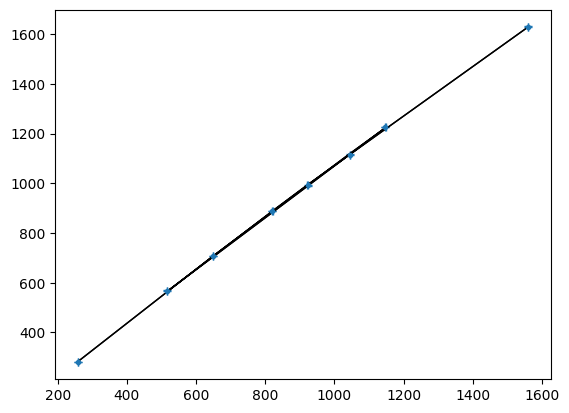

a: -5.8123818594927777e-05 +- 6.875416067869986e-06
b: 1.1403293985944798 +- 0.012788695918607394
c: -7.989832238853127 +- 5.445423027957522


In [5]:
standard = np.array(det0[28])

stpeaks = standard[:,0]

det = det4
runs = len(det)
p0 = [(1,1,0)]
fit_params = np.zeros((runs,3))
dfit_params = np.zeros((runs,3))
diff = np.zeros((runs,8)); Ddiff = np.zeros((runs,8))
peaks = np.zeros((len(det),8)); dpeaks = np.zeros((len(det),8))
pcal = np.zeros((len(det),8)) ; dpcal = np.zeros((len(det),8))

for i in range(len(det)):

    peaks[i] = np.array(det[i])[:,0]
    dpeaks[i] = np.array(det[i])[:,1]

    popt, pcov = opt.curve_fit(func, peaks[i], stpeaks, p0 = p0)
    perr= np.sqrt(np.diag(pcov))
    #data_fitted = func(np.array(det0[i])[:,0], *popt)
    fit_params[i,:] = popt
    dfit_params[i,:] = perr

    for j in range(8):

        pcal[i,j] = func(peaks[i], *fit_params[i])[j]
        diff[i,j] = stpeaks[j] - pcal[i,j]

        dpcal[i,j] = np.sqrt(((2*fit_params[i,0]+fit_params[i,1])*dpeaks[i,j])**2+(peaks[i,j]**2*dfit_params[i,0])**2+(peaks[i,j]*dfit_params[i,1])**2+(dfit_params[i,2])**2)
        

        Ddiff[i,j] = np.sqrt((standard[j,1])**2+(dpcal[i,j])**2)




j = 28
plt.figure()
plt.errorbar(np.array(det[j])[:,0], stpeaks, xerr = np.array(det[j])[:,1], yerr = standard[:,1], marker = '.', capsize = 3, linestyle = 'None')
plt.plot(np.array(det[j])[:,0],func(np.array(det[j])[:,0],*fit_params[j]), linewidth = 1,label = 'fit', color='black')
plt.plot(np.array(det[j])[:,0],func(np.array(det[j])[:,0],*fit_params[j]), linewidth = 1,label = 'fit', color='black')
plt.show()
print('a:', fit_params[j,0], '+-',dfit_params[j,0])
print('b:', fit_params[j,1], '+-',dfit_params[j,1])
print('c:', fit_params[j,2], '+-',dfit_params[j,2])

In [6]:
print(max(Ddiff[0]))
print(max(diff[0]))

27.55345137141941
4.514854739254702


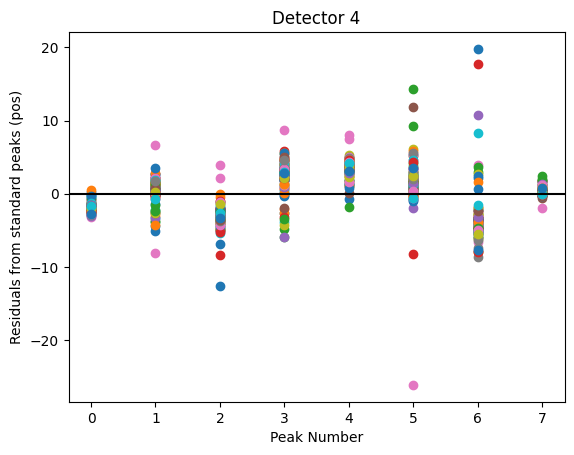

In [7]:
x = np.linspace(0,7, num = 8)


detnum = 4
plt.figure()
plt.axhline(y = 0, color= 'black')
for i in range(len(det)):
    # plt.errorbar(x, diff[i,:], yerr = Ddiff[i,:],marker = 'o', capsize = 3, linestyle = 'None')
    plt.scatter(x,diff[i,:])

plt.xlabel('Peak Number')
plt.ylabel('Residuals from standard peaks (pos)')
plt.title(f'Detector {detnum}')
plt.show()

[ 279.40308248  707.7868246  1115.88220896 1225.88207746  568.65487249
  889.51086131  991.36050989 1629.26095689]


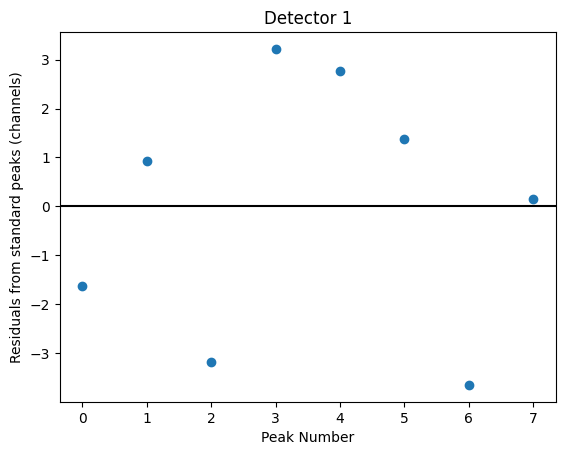

In [8]:
x = np.linspace(0,7, num = 8)
print(stpeaks)

detnum = 1
run = 37
plt.figure()
plt.axhline(y = 0, color= 'black')

plt.scatter(x, diff[run,:])
plt.xlabel('Peak Number')
plt.ylabel('Residuals from standard peaks (channels)')
plt.title(f'Detector {1}')
plt.show()

In [9]:
det0fits = fitruns(det0,det0[28],0,True)
det1fits = fitruns(det1,det0[28],1,True)
det2fits = fitruns(det2,det0[28],2,True)
det3fits = fitruns(det3,det0[28],3,True)
det4fits = fitruns(det4,det0[28],4,True)

detfits = []
detfits.append(det0fits)
detfits.append(det1fits)
detfits.append(det2fits)
detfits.append(det3fits)
detfits.append(det4fits)

/home/dhoulihan/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [21]:
# np.shape(det0fits)
# print(type(det0fits))
# print(det0fits[0][:,0])

np.shape(detfits[0])
print(detfits[0][0][0,0])

1.9367942170608983e-07


This code cell takes the original analyzed root files and adds a new tree with the gain-matched data. It then creates new output files of the new tree. It is preferable to have the output in a separate folder inside the analyzed directory to avoid overwriting the original files.

In [29]:
def histo1d(Frame, Name, X, X_List):
   #X_List should be something like X_List = [bins,initial,final]
   histo1d = Frame.Histo1D((f"{Name}",f"{Name}",X_List[0], X_List[1], X_List[2]),X)
   return histo1d


path = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Workingdir/analyzed/'

#Creates a list of run numbers give it the path.  Directory should only have the trees that you want to use
run_list = []
for filename in os.listdir(path):
   if filename.endswith(".root"):
       run_number = int(filename.split("_")[1].split(".")[0])
       run_list.append(run_number)

run_list.sort()

# print(len(run_list))

column_names = {"anodeBack", "anodeBackTime", "anodeFront", "anodeFrontTime", "cathode", "cathodeTime",\
                "cebraE0", "cebraE1", "cebraE2", "cebraE3", "cebraE4", "cebraTime0", "cebraTime1", "cebraTime2",\
                 "cebraTime3", "cebraTime4", "delayBackLeftE", "delayBackLeftTime", \
                 "delayBackRightE",  "delayBackRightTime", "delayFrontLeftE", \
                 "delayFrontLeftTime", "delayFrontRightE", "delayFrontRightTime", \
                 "scintLeft", "scintLeftTime", "scintRight", "scintRightTime", "theta", "x1", "x2", "xavg"\
                , "cebraE0_GM", "cebraE1_GM", "cebraE2_GM", "cebraE3_GM", "cebraE4_GM", \
                'cebraTime0_toScint', 'cebraTime1_toScint', 'cebraTime2_toScint', 'cebraTime3_toScint', 'cebraTime4_toScint' }

for i in range(len(run_list)):
   

    print(f"Run {run_list[i]}")

    df = ROOT.RDataFrame("SPSTree",f"{path}run_{run_list[i]}.root")
    cebraE_raw_to_ECal = []

    for j in range(5):
        
        # df_i = df.Filter(f"cebraE{j} != -1")
        # PID_filter_cond = f"anodeBackTime != -1e6 && xavg != -1e6 && scintLeft > {SLmin} && scintLeft < {SLmax} && anodeBack > {ABmin} && anodeBack < {ABmax}"
        # root_df_filtered = df_i.Filter(f"{PID_filter_cond}") # applying PID filter

        a = detfits[j][0][i,0]
        b = detfits[j][0][i,1]
        c = detfits[j][0][i,2]

        caldata = f"{a}*cebraE{j}*cebraE{j} + {b}*cebraE{j} + {c}"
        df = df.Define(f'cebraE{j}_GM', caldata)
        
        df = df.Define(f'cebraTime{j}_toScint', f'cebraTime{j} - scintLeftTime')


    df.Snapshot('SPSTree', f"{path}/GMandcut/run_{run_list[i]}.root", column_names)


#    output = ROOT.TFile.Open(f"run_{run_list[i]}_cebraEnergyGM.root", "RECREATE")
#    output.cd()
#    for k in range(5):
#        output.mkdir(f"det{k}_GM")
#        output.cd(f"det{k}_GM")
#        cebraE_raw_to_ECal[k].Write()
   
#    output.Close()





This code is to do PID cuts so that the files are much smaller and quicker to work with

In [15]:
GMpath = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Workingdir/analyzed/GainMatched/'
path = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Workingdir/analyzed/'

#Creates a list of run numbers give it the path.  Directory should only have the trees that you want to use
run_list = []
for filename in os.listdir(GMpath):
   if filename.endswith(".root"):
       run_number = int(filename.split("_")[1].split(".")[0])
       run_list.append(run_number)

run_list.sort()

# print(len(run_list))

column_names = {"anodeBack", "anodeBackTime", "anodeFront", "anodeFrontTime", "cathode", "cathodeTime",\
                "cebraE0", "cebraE1", "cebraE2", "cebraE3", "cebraE4", "cebraTime0", "cebraTime1", "cebraTime2",\
                 "cebraTime3", "cebraTime4", "delayBackLeftE", "delayBackLeftTime", \
                 "delayBackRightE",  "delayBackRightTime", "delayFrontLeftE", \
                 "delayFrontLeftTime", "delayFrontRightE", "delayFrontRightTime", \
                 "scintLeft", "scintLeftTime", "scintRight", "scintRightTime", "theta", "x1", "x2", "xavg"\
                , "cebraE0_GM", "cebraE1_GM", "cebraE2_GM", "cebraE3_GM", "cebraE4_GM", \
                'cebraTime0_toScint', 'cebraTime1_toScint', 'cebraTime2_toScint', 'cebraTime3_toScint', 'cebraTime4_toScint' }

start = 113; finish = 134
SLABpar = [[335,750,470,1290],[189,994,559,1290],[118,395,685,1402],\
           [68, 311,800,1460],[61, 230,920,1520],[12,152,1145,1640]]

j = 5
SLmin = SLABpar[j][0]; 
SLmax = SLABpar[j][1]; 
ABmin = SLABpar[j][2]; 
ABmax = SLABpar[j][3]

for i in run_list:
        if i >= start:
                if i <= finish:
    

                    print(f"Run {i}")

                    df = ROOT.RDataFrame("SPSTree",f"{GMpath}run_{i}.root")
                   

                    PID_filter_cond = f"anodeBackTime != -1e6 && xavg != -1e6 && scintLeft > {SLmin} && scintLeft < {SLmax} && anodeBack > {ABmin} && anodeBack < {ABmax}"
                    root_df_filtered = df.Filter(f"{PID_filter_cond}") # applying PID Cut

                    
                    root_df_filtered.Snapshot('SPSTree', f"{path}GMandcut/run_{i}.root", column_names)

Run 113
Run 114
Run 115
Run 116
Run 117
Run 118
Run 119
Run 120
Run 121
Run 122
Run 123
Run 124
Run 125
Run 126
Run 127
Run 128
Run 129
Run 130
Run 131
Run 132
Run 133
Run 134


This code cell takes the new root files created above and outputs the cebra energy histograms for each detector. One can then hadd them together, and since the histograms have the same name, they all get added to one histogram in the new root file. 

In [163]:
def histo1d(Frame, Name, X, X_List):
   #X_List should be something like X_List = [bins,initial,final]
   histo1d = Frame.Histo1D((f"{Name}",f"{Name}",X_List[0], X_List[1], X_List[2]),X)
   return histo1d

path = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Workingdir/analyzed/GainMatched/'

run_list = []
for filename in os.listdir(path):
   if filename.endswith(".root"):
       run_number = int(filename.split("_")[1].split(".")[0])
       run_list.append(run_number)

run_list.sort()

for i in range(len(run_list)):

    print(f"Run {run_list[i]}")
   
    df = ROOT.RDataFrame("SPSTree",f"{path}run_{run_list[i]}.root")
    cebraE_raw_to_ECal = []
   
    for j in range(5):
        df_i = df.Filter(f"cebraE{j} != -1")
        
        cebraE_raw_to_ECal.append(histo1d(df_i, f'cebraE{j}_GM',f'cebraE{j}_GM', [512,0,4096]))

    output = ROOT.TFile.Open(f"run_{run_list[i]}_cebraEnergyGM.root", "RECREATE")
    output.cd()
    for k in range(5):
        output.mkdir(f"det{k}_GM")
        output.cd(f"det{k}_GM")
        cebraE_raw_to_ECal[k].Write()
    
    output.Close()


1.0


In [112]:
path = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Workingdir/analyzed/GMandcut/'

def histo1d(Frame, Name, X, X_List):
   #X_List should be something like X_List = [bins,initial,final]
   histo1d = Frame.Histo1D((f"{Name}",f"{Name}",X_List[0], X_List[1], X_List[2]),X)
   return histo1d

df = ROOT.RDataFrame("SPSTree",f"{path}run_28.root")
cebraE_raw_to_ECal = []
final_CE = []; finalCEarr = []
tshift = [710,708,707,707,677]
twidth = 6
SLmin = 335; SLmax = 750; ABmin = 470; ABmax = 1290
columns = ['cebraE0_GM', 'cebraE1_GM', 'cebraE2_GM']
for j in range(5):
    df_i = df.Filter(f"cebraE{j} != -1")
    PID_filter_cond = "anodeBackTime != -1e6 && xavg != -1e6 && scintLeft > {} && scintLeft < {} && anodeBack > {} && anodeBack < {}".format(SLmin,SLmax,ABmin,ABmax)
    root_df_filtered = df_i.Filter(f"{PID_filter_cond}") # applying PID filter
    dettimecut1 = df_i.Define(f"cebra_RelTime_toScint_{j}", f"cebraTime{j} - scintLeftTime + {tshift[j]}")
    timecut = f"cebra_RelTime_toScint_{j} > {-twidth} && cebra_RelTime_toScint_{j} < {twidth}"
    dettimecut = dettimecut1.Filter(f"{timecut}")
    final_CE.append(pd.DataFrame(dettimecut.AsNumpy(columns = [f'cebraE{j}_GM'])))
    finalCEarr.append(np.array(final_CE[j][f'cebraE{j}_GM']))
#     cebraE_raw_to_ECal.append(histo1d(dettimecut, f'cebraE{j}_GM',f'cebraE{j}_GM', [512,0,4096]))



# output = ROOT.TFile.Open(f"test.root", "RECREATE")
# output.cd()
# for k in range(5):
#     output.mkdir(f"det{k}_GM")
#     output.cd(f"det{k}_GM")
#     cebraE_raw_to_ECal[k].Write()
    
# output.Close()

In [45]:
path = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Workingdir/analyzed/GMandcut/'

def Ecal(x,a,b,c):
    return a*x**2 + x*b + c

def combineCEandxavg(start, finish, path, tshift,twidth,gamma):

    run_list = []
    for filename in os.listdir(path):
        if filename.endswith(".root"):
            run_number = int(filename.split("_")[1].split(".")[0])
            run_list.append(run_number)

    run_list.sort()

    
    combine_detCE = []; combine_detxavg = []


    for i in run_list:
        if i >= start:
            if i <= finish:

                # print(i)
                df = ROOT.RDataFrame("SPSTree",f"{path}run_{i}.root")
                    
                final_CE = []; finalCEarr = []
                final_xavg = []; finalxavgarr = []                 
            
                for j in range(5):

                    df_i = df.Filter(f"cebraE{j} != -1")
                    

                    dettimecut1 = df_i.Define(f"cebra_RelTime_toScint_{j}", f"cebraTime{j} - scintLeftTime + {tshift[j]}")
                    timecut = f"cebra_RelTime_toScint_{j} > {-twidth} && cebra_RelTime_toScint_{j} < {twidth}"
                    dettimecut = dettimecut1.Filter(f"{timecut}")

                    final_CE.append(pd.DataFrame(dettimecut.AsNumpy(columns = [f'cebraE{j}_GM'])))
                    finalCEarr.append(np.array(final_CE[j][f'cebraE{j}_GM']))

                    final_xavg.append(pd.DataFrame(dettimecut.AsNumpy(columns = ['xavg'])))
                   
                
                combine_detCE.append(np.concatenate(finalCEarr, axis = 0))
                combine_detxavg.append(pd.concat(final_xavg, axis = 0))

    totaldetCE = np.concatenate(combine_detCE, axis = 0)
    totaldetxavg = pd.concat(combine_detxavg, axis = 0)
    
    if gamma == True:
        return totaldetCE
    if gamma == False:
        return totaldetxavg
# print(np.shape(combine_det))

In [37]:
path = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Workingdir/analyzed/GMandcut/'
tshift = [[710,708,707,707,677], [722,721,720,719,690],[736,733,734,733,703],\
          [746,745,745,744,714],[757,756,754,753,724],[774,772,772,771,742]]
twidth = 6
SLABpar = [[335,750,470,1290],[189,994,559,1290],[118,395,685,1402],\
           [68, 311,800,1460],[61, 230,920,1520],[12,152,1145,1640]]

In [80]:
# getting cebra det info
runs4_30 =  combineCEandxavg(4,30,path, tshift[0],  twidth, True)
runs31_38 = combineCEandxavg(31,38,path, tshift[1], twidth, True)
runs39_53 = combineCEandxavg(39,53,path, tshift[2], 8, True)
runs68_84 = combineCEandxavg(68,84,path, tshift[3], 10, True)
runs85_112 =combineCEandxavg(85,112,path, tshift[4], 10, True)
runs113_134=combineCEandxavg(113,134,path, tshift[5],10, True)

In [81]:
xavg4_30 =  combineCEandxavg(4,30,path, tshift[0],twidth,   False)
xavg31_38 = combineCEandxavg(31,38,path, tshift[1],twidth,  False)
xavg39_53 = combineCEandxavg(39,53,path, tshift[2],8,  False)
xavg68_84 = combineCEandxavg(68,84,path, tshift[3],10,  False)
xavg85_112 =combineCEandxavg(85,112,path, tshift[4],10, False)
xavg113_134=combineCEandxavg(113,134,path, tshift[5],10,False)

In [106]:
allruns = []
allruns.append(runs4_30)
allruns.append(runs31_38)
allruns.append(runs39_53)
allruns.append(runs68_84)
allruns.append(runs85_112)
allruns.append(runs113_134)

totalgrays = np.concatenate(allruns, axis = 0)

# energy calibrating

fitpar = [[-0.0030797,-14.3656, 1984.7056],[-0.00204,-11.03256,5251.766]\
          ,[-0.0008726,-8.6791,7840.8340],[0.00329886,-8.18386,9405.789],[0.0031105,-8.31563,10585.9494]\
          ,[0.002247, -8.28524,12746.2791]]

xavgcal4_30   = Ecal(xavg4_30['xavg'], *fitpar[0])
xavgcal31_38  = Ecal(xavg31_38['xavg']  , *fitpar[1])
xavgcal39_53  = Ecal(xavg39_53['xavg']  , *fitpar[2])
xavgcal68_84  = Ecal(xavg68_84['xavg']  , *fitpar[3])
xavgcal85_112 = Ecal(xavg85_112['xavg'] , *fitpar[4])
xavgcal113_134= Ecal(xavg113_134['xavg'], *fitpar[5])

totalxavg = np.concatenate((xavg4_30['xavg'], xavg31_38['xavg'], xavg39_53['xavg'], xavg68_84['xavg'], xavg85_112['xavg'], xavg113_134['xavg']))
totaldeutE = np.concatenate((xavgcal4_30, xavgcal31_38, xavgcal39_53, xavgcal68_84, xavgcal85_112, xavgcal113_134))

print(type(totalgrays),len(totaldeutE))

<class 'numpy.ndarray'> 13876


13876

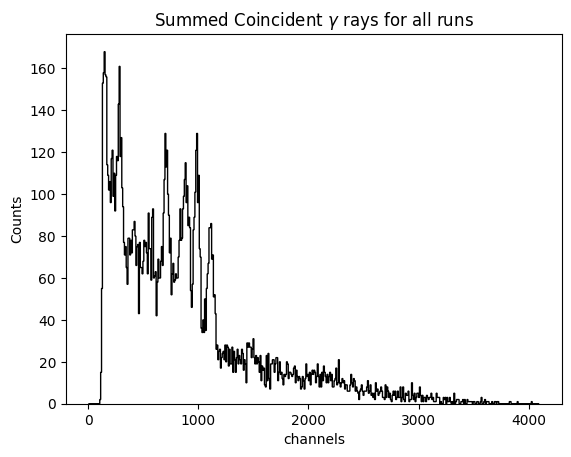

In [83]:
plt.figure()
#plt.hist(df['Xavg'], bins = 600, range = [-300,300], histtype= 'step')
plt.hist(totalgrays, bins = 512, range = [0,4096], histtype= 'step', color = 'black')
#plt.legend(loc = 'best')
plt.xlabel('channels')
plt.ylabel('Counts')
plt.title('Summed Coincident $\gamma$ rays for all runs')

len(totalgrays)

In [112]:
# saving the above histogram to a root file so I can energy calibrate with hdtv
output = ROOT.TFile.Open(f"CeBrAEGMalldetsummed.root", "RECREATE")
output.cd()

hist = ROOT.TH1F('CeBrA_alldet', 'CeBrA_alldet', 512, 0, 4096)
[hist.Fill(i) for i in totalgrays]
hist.Write()
output.Close()


#     cebraE_raw_to_ECal.append(histo1d(dettimecut, f'cebraE{j}_GM',f'cebraE{j}_GM', [512,0,4096]))

# output = ROOT.TFile.Open(f"test.root", "RECREATE")
# output.cd()
# for k in range(5):
#     output.mkdir(f"det{k}_GM")
#     output.cd(f"det{k}_GM")
#     cebraE_raw_to_ECal[k].Write()
    

Now to make the particle-gamma matrix!

In [28]:
path = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Workingdir/analyzed/GMandcut/'
tshift = [[710,708,707,707,677], [722,721,720,719,690],[736,733,734,733,703],\
          [746,745,745,744,714],[757,756,754,753,724],[774,772,772,771,742]]
twidth = 6
SLABpar = [[335,750,470,1290],[189,994,559,1290],[118,395,685,1402],\
           [68, 311,800,1460],[61, 230,920,1520],[12,152,1145,1640]]

fitpar = [[-0.0030797,-14.3656, 1984.7056],[-0.00204,-11.03256,5251.766]\
          ,[-0.0008726,-8.6791,7840.8340],[0.00329886,-8.18386,9405.789],[0.0031105,-8.31563,10585.9494]\
          ,[0.002247, -8.28524,12746.2791]]



545 13876


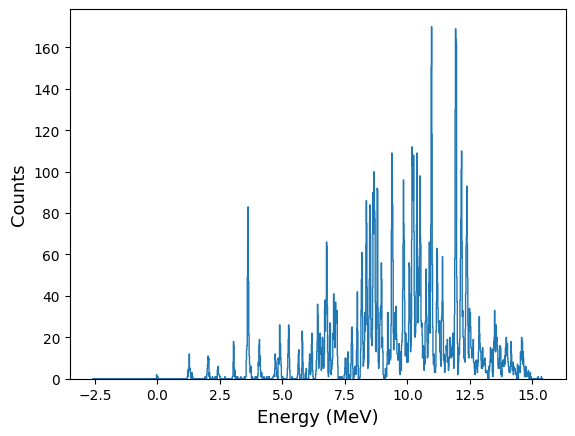

In [114]:
# xmin = 50; xmax = 4000
# ymin = 50; ymax = 4000
# bins = 400

plt.figure()
plt.hist(totaldeutE/1000, bins = 1202, range = [-2.602,15.434], histtype= 'step')
# plt.hist(xavgcal31_38/1000, bins = 441, range = [1.758,8.378], histtype= 'step')
# plt.hist(xavgcal39_53/1000, bins = 347, range = [5.158,10.366], histtype= 'step')
plt.ylabel('Counts', fontsize = 13)
plt.xlabel('Energy (MeV)', fontsize = 13)
print(len(xavg4_30),len(totalgrays))

Text(0.5, 0, '$^{24}$Si Energy (keV)')

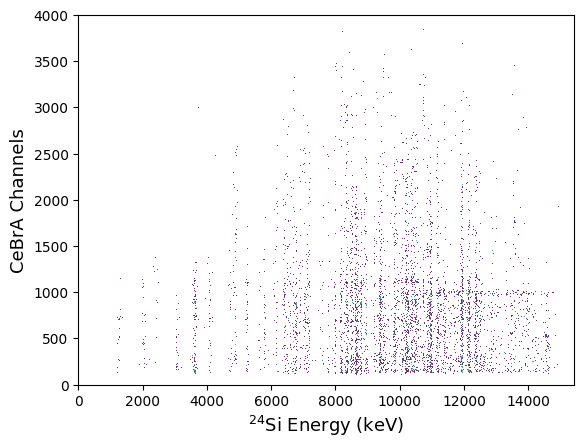

In [116]:
xmin = -2602; xmax = 15434
ymin = 0; ymax = 4000
bins = 400

#matchlen = np.concatenate([totalgrays, np.full(len(totaldeutE)-len(totalgrays), np.nan)])

plt.figure()
#plt.hist(df['Xavg'], bins = 600, range = [-300,300], histtype= 'step')
plt.hist2d(totaldeutE, totalgrays, bins = [1202,512], range = [[xmin,xmax],[ymin,ymax]], cmap = 'viridis', norm = colors.LogNorm(), alpha = 0.8)
plt.xlim(0,15434)
#plt.legend(loc = 'best')
plt.ylabel('CeBrA Channels', fontsize = 13)
plt.xlabel('$^{24}$Si Energy (keV)', fontsize = 13)

In [120]:
output = ROOT.TFile.Open(f"pgmatrix_uncal.root", "RECREATE")
output.cd()

hist = ROOT.TH2F('deutgammamatrix', 'deutgammamatrix', 1202, -2602, 15434, 512, 0, 4096)
for i in range(len(totaldeutE)):
    hist.Fill(totaldeutE[i],totalgrays[i])
    
hist.Write()
output.Close()


Checking if the PID and timing cuts look good!

In [52]:
def combinePID_cut(start, finish, path):

    run_list = []
    for filename in os.listdir(path):
        if filename.endswith(".root"):
            run_number = int(filename.split("_")[1].split(".")[0])
            run_list.append(run_number)

    run_list.sort()
    
    PIDlist = []
    
    for i in run_list:
        if i >= start:
            if i <= finish:
                df = ROOT.RDataFrame("SPSTree",f"{path}run_{i}.root")

                PIDlist.append(pd.DataFrame(df.AsNumpy(columns = ['scintLeft','anodeBack'])))

                    
                #uncutlist.append(pd.DataFrame(df.AsNumpy(columns = ['scintLeft','anodeBack'])))

    SLonly = []; ABonly = []            
    for i in range(len(PIDlist)):
        SLonly.append(np.array(PIDlist[i]['scintLeft']))
        ABonly.append(np.array(PIDlist[i]['anodeBack']))
        
    SLtotal = np.concatenate(SLonly, axis = 0)
    ABtotal = np.concatenate(ABonly, axis = 0)
    return SLtotal, ABtotal

In [55]:
path = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Workingdir/analyzed/GMandcut/'

pidruns4_30 = combinePID_cut(4,30,path)
pidruns31_38 = combinePID_cut(31,38,path)
pidruns39_53 = combinePID_cut(39,53,path)
pidruns68_84 = combinePID_cut(68,84,path)
pidruns85_112 = combinePID_cut(85,112,path)
pidruns113_134 = combinePID_cut(113,134,path)

In [57]:
histlist = []
histlistcut = []

histlist.append(pidruns4_30)
histlist.append(pidruns31_38)
histlist.append(pidruns39_53)
histlist.append(pidruns68_84)
histlist.append(pidruns85_112)
histlist.append(pidruns113_134)

print(histlist[0][0])

[479. 481. 536. ... 423. 547. 504.]


60096 60096


Text(0.5, 0, 'Rest Energy (arb. units)')

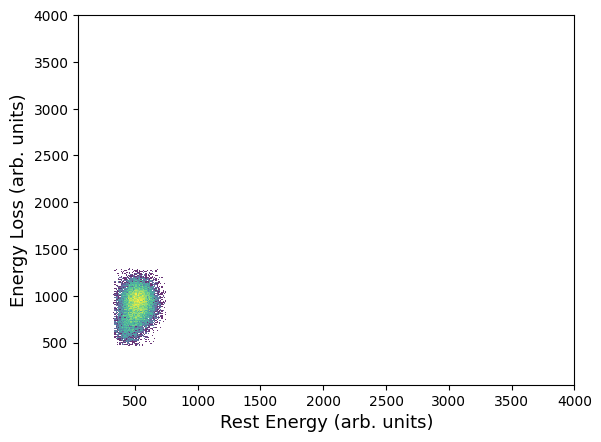

In [56]:
# xmin = min(pidruns4_30[0]) - 100; xmax = max(pidruns4_30[0]) + 100
# ymin = min(pidruns4_30[1]) - 100; ymax = max(pidruns4_30[1]) + 100
# bins = 400

xmin = 50; xmax = 4000
ymin = 50; ymax = 4000
bins = 400

print(len(pidruns113_134[0]),len(pidruns113_134[1]))
plt.figure()
#plt.hist(df['Xavg'], bins = 600, range = [-300,300], histtype= 'step')
plt.hist2d(pidruns4_30[0], pidruns4_30[1],bins = [bins,bins], range = [[xmin,xmax],[ymin,ymax]], cmap = 'viridis', norm = colors.LogNorm(), alpha = 0.8)
#plt.legend(loc = 'best')
plt.ylabel('Energy Loss (arb. units)', fontsize = 13)
plt.xlabel('Rest Energy (arb. units)', fontsize = 13)

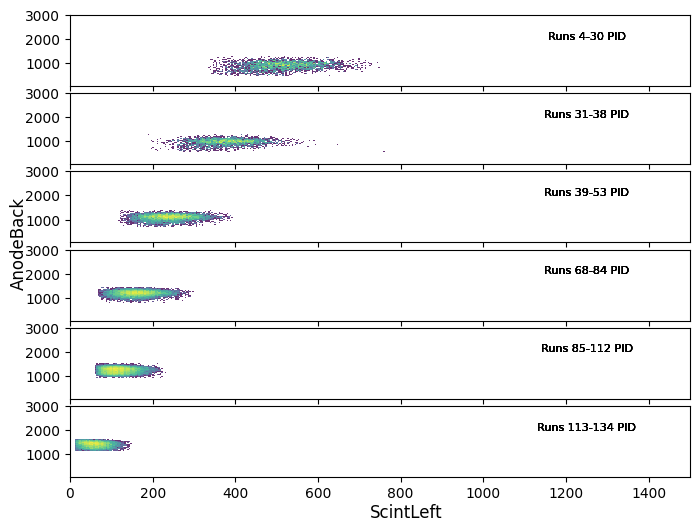

In [68]:
fig, axs = plt.subplots(6,1,figsize = (8,6), sharex = True)
fig.text(0.05, 0.5, 'AnodeBack', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.05, 'ScintLeft', va='center', rotation='horizontal', fontsize = 12)
plt.subplots_adjust(hspace=0.1, wspace = 0.1)
xmin = 0; xmax = 1500
ymin = 50; ymax = 3000
bins = 400

for i in range(6):
  axs[i].hist2d(histlist[i][0], histlist[i][1],bins = [bins,bins], range = [[xmin,xmax],[ymin,ymax]], cmap = 'viridis', norm = colors.LogNorm(), alpha = 0.8)
  axs[0].annotate('Runs 4-30 PID', (1250,2000), fontsize = 8,linespacing = 0.8, ha = 'center')
  axs[1].annotate('Runs 31-38 PID', (1250,2000), fontsize = 8,linespacing = 0.8, ha = 'center')
  axs[2].annotate('Runs 39-53 PID', (1250,2000), fontsize = 8,linespacing = 0.8, ha = 'center')
  axs[3].annotate('Runs 68-84 PID', (1250,2000), fontsize = 8,linespacing = 0.8, ha = 'center')
  axs[4].annotate('Runs 85-112 PID', (1250,2000), fontsize = 8,linespacing = 0.8, ha = 'center')
  axs[5].annotate('Runs 113-134 PID', (1250,2000), fontsize = 8,linespacing = 0.8, ha = 'center')




In [71]:
def combineT_cut(start, finish, path, tshift,twidth):

    run_list = []
    for filename in os.listdir(path):
        if filename.endswith(".root"):
            run_number = int(filename.split("_")[1].split(".")[0])
            run_list.append(run_number)

    run_list.sort()

    dettime = []

    for i in run_list:
        if i >= start:
            if i <= finish:

                # print(i)
                df = ROOT.RDataFrame("SPSTree",f"{path}run_{i}.root")             
                
                for det in range(5):
                    df_i = df.Filter(f"cebraE{det} != -1")
                    
                    dettimecut1 = df_i.Define(f"cebra_RelTime_toScint_{det}", f"cebraTime{det} - scintLeftTime + {tshift[det]}")
                    timecut = f"cebra_RelTime_toScint_{det} > {-twidth} && cebra_RelTime_toScint_{det} < {twidth}"
                    dettimecut = dettimecut1.Filter(f"{timecut}")

                    dettime.append(pd.DataFrame(dettimecut.AsNumpy(columns = [f'cebra_RelTime_toScint_{det}'])))
                    
                # dettimearr.append(np.array(dettime[i][f'cebraTime{det}']))
                
    combined_df = pd.concat(dettime, axis = 0, ignore_index = True)
        
    return combined_df
# print(np.shape(combine_det))

In [88]:
path = '/home/dhoulihan/Projects/SPS_CEBRA_Oct2022ad/Workingdir/analyzed/GMandcut/'
tshift = [[710,708,707,707,677], [722,721,720,719,690],[736,733,734,733,703],\
          [746,745,745,744,714],[757,756,754,753,724],[774,772,772,771,742]]
twidth = 6
SLABpar = [[335,750,470,1290],[189,994,559,1290],[118,395,685,1402],\
           [68, 311,800,1460],[61, 230,920,1520],[12,152,1145,1640]]

tcutruns4_30 = combineT_cut(4,30,path, tshift[0],twidth)
tcutruns31_38 = combineT_cut(31,38,path, tshift[1],twidth)
tcutruns39_53 = combineT_cut(39,53,path, tshift[2],8)
tcutruns68_84 = combineT_cut(68,84,path, tshift[3],8)
tcutruns85_112 = combineT_cut(85,112,path, tshift[4],8)
tcutruns113_134 = combineT_cut(113,134,path, tshift[5],8)

In [89]:
thistlist = []
thistlistcut = []

thistlist.append(tcutruns4_30)
thistlist.append(tcutruns31_38)
thistlist.append(tcutruns39_53)
thistlist.append(tcutruns68_84)
thistlist.append(tcutruns85_112)
thistlist.append(tcutruns113_134)

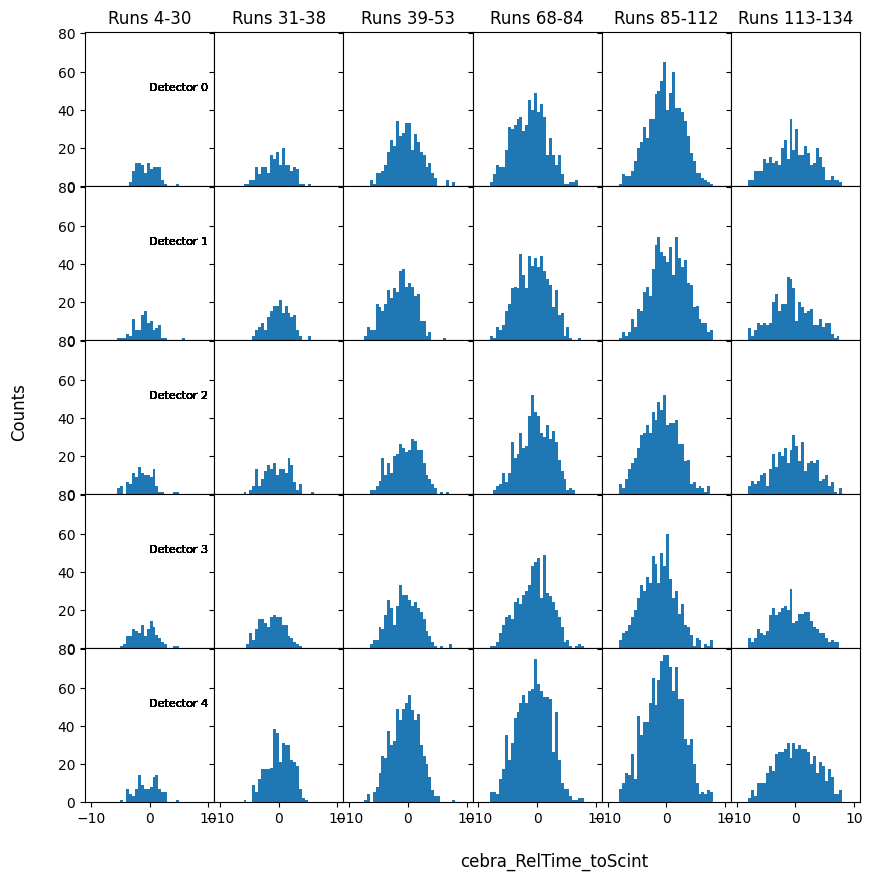

In [90]:
fig, axs = plt.subplots(5,6,figsize = (10,10), sharex = True, sharey = True)
fig.text(0.05, 0.5, 'Counts', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.05, 'cebra_RelTime_toScint', va='center', rotation='horizontal', fontsize = 12)
plt.subplots_adjust(hspace=0, wspace = 0)
xmin = -10; xmax = 10

bins = 40

for i in range(5):
    for j in range(6):
      axs[i][j].hist(thistlist[j][f'cebra_RelTime_toScint_{i}'],bins = bins, range = [-10,10])
      axs[0][0].set_title('Runs 4-30')
      axs[0][1].set_title('Runs 31-38')
      axs[0][2].set_title('Runs 39-53')
      axs[0][3].set_title('Runs 68-84')
      axs[0][4].set_title('Runs 85-112')
      axs[0][5].set_title('Runs 113-134')

      # axs[i][1].hist(thistlistcut[j][f'cebra_RelTime_toScint_{i}'], bins = [bins,bins], range = [xmin,xmax], histtype= 'step')
      axs[0][0].annotate('Detector 0', (5,50), fontsize = 8,linespacing = 0.8, ha = 'center')
      axs[1][0].annotate('Detector 1', (5,50), fontsize = 8,linespacing = 0.8, ha = 'center')
      axs[2][0].annotate('Detector 2', (5,50), fontsize = 8,linespacing = 0.8, ha = 'center')
      axs[3][0].annotate('Detector 3', (5,50), fontsize = 8,linespacing = 0.8, ha = 'center')
      axs[4][0].annotate('Detector 4', (5,50), fontsize = 8,linespacing = 0.8, ha = 'center')


In [ ]:
# plt.figure()
# plt.hist(tcutruns31_38['cebra_RelTime_toScint_1'], bins = 40, range = [-10,10], histtype= 'step')
# # plt.hist2d(pidruns4_30[0], pidruns4_30[1],bins = [bins,bins], range = [[xmin,xmax],[ymin,ymax]], cmap = 'viridis', norm = colors.LogNorm(), alpha = 0.8)
# #plt.legend(loc = 'best')
# plt.ylabel('Energy Loss (arb. units)', fontsize = 13)
# plt.xlabel('Rest Energy (arb. units)', fontsize = 13)